## BDA3 chapter1 exercise

9.Simulation of a queuing problem: a clinic has three doctors. Patients come into the clinic at random, starting at 9 a.m., according to a Poisson process with time parameter 10 minutes: that is, the time after opening at which the first patient appears follows an exponential distribution with expectation 10 minutes and then, after each patient arrives, the waiting time until the next patient is independently exponentially distributed, also with expectation 10 minutes. When a patient arrives, he or she waits until a doctor is available. The amount of time spent by each doctor with each patient is a random variable, uniformly distributed between 5 and 20 minutes. The office stops admitting new patients at 4 p.m. and closes when the last patient is through with the doctor.
(a) Simulate this process once. How many patients came to the office? How many had to wait for a doctor? What was their average wait? When did the office close?
(b) Simulate the process 100 times and estimate the median and 50% interval for each of the summaries in (a).

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### setting
* 9 a.m. to 4 p.m. , that is 7 hours = 420 mininutes
* patient arrival inteval  ~ exponential(10)
* The amount of time spent by each doctor with each patient ~ Uniform(5, 20)

In [89]:
def generate_patient_list():

    cum_minites = 0
    patient_list = []
    for patient_id in range(500):
        interval = np.random.exponential(size=1, scale=10)[0]
        doc_time = np.random.uniform(5, 20)

        cum_minites += interval
        if cum_minites > 420:
            break

        wating_time = 0 
        tmp_ = [patient_id, interval, cum_minites, wating_time, doc_time, 0]
        patient_list.append(tmp_)

    patient_df = pd.DataFrame(patient_list, columns=["patient_id", "interval", "cum_minites", "wating_time", "doc_time", "end_time"])
    return patient_df

In [100]:
def calculate_wating_time(patient_df, doctor_num):

    for i in patient_df.index:
        if i ==0:
            patient_df.loc[i, "end_time"] = patient_df.ix[i]["cum_minites"] + patient_df.ix[i]["doc_time"]
        else:
            end_time_ar = np.array(patient_df.ix[:(i-1)]["end_time"])
            current_time = patient_df.ix[i]["cum_minites"]

            #待ち時間なし
            if sum(end_time_ar > current_time) < doctor_num:
                patient_df.loc[i, "end_time"] = patient_df.ix[i]["cum_minites"] + patient_df.ix[i]["doc_time"]
            else:
                time_diff = end_time_ar - current_time
                wating_time = min(time_diff[time_diff > 0])
                patient_df.loc[i, "wating_time"] = wating_time
                patient_df.loc[i, "end_time"] = patient_df.ix[i]["cum_minites"] + patient_df.ix[i]["doc_time"] + wating_time
    
    return patient_df

In [113]:
def get_stats(patient_df, verbose=False):
    
    #How many patients came to the office? 
    num_patients = patient_df.shape[0]
    
    #How many had to wait for a doctor?
    wait_patient_num = sum(patient_df["wating_time"] > 0)
    
    #What was their average wait? 
    avg_wait_time = np.mean(patient_df["wating_time"] )
    
    #When did the office close?
    close_time = np.max(patient_df["end_time"] )
    
    if verbose:
        print("The number of patients: ", num_patients)
        print("The number of patients to wait: ", wait_patient_num)
        print("average wait: ", avg_wait_time)
        print("close_time wait: ", avg_wait_time)
    
    return num_patients, wait_patient_num, avg_wait_time, close_time
    

### (a) Simulate this process once. How many patients came to the office? How many had to wait for a doctor? What was their average wait? When did the office close?

In [114]:
patient_df = generate_patient_list()
patient_df2 = calculate_wating_time(patient_df, doctor_num=3)
get_stats(patient_df2, verbose=True)

The number of patients:  53
The number of patients to wait:  10
average wait:  0.853970729414
close_time wait:  0.853970729414


(53, 10, 0.85397072941413321, 430.67928922978444)

### (b) Simulate the process 100 times and estimate the median and 50% interval for each of the summaries in (a)

In [148]:
num_patients_hist = []
wait_patient_num_hist = []
avg_wait_time_hist = []
close_time_hist = []

for i in range(100):
    patient_df = generate_patient_list()
    patient_df2 = calculate_wating_time(patient_df, doctor_num=3)
    num_patients, wait_patient_num, avg_wait_time, close_time = get_stats(patient_df2, verbose=False)
    
    num_patients_hist.append(num_patients)
    wait_patient_num_hist.append(wait_patient_num)
    avg_wait_time_hist.append(avg_wait_time)
    close_time_hist.append(close_time)

In [149]:
def make_hist_and_stats(stats_list):
    stats_list_ar = np.array(stats_list)
    plt.hist(stats_list_ar);
    stats = np.percentile(stats_list_ar, q= [25, 50, 75])
    print("25pct: %.3f  /median: %.3f /75pct: %.3f"%(stats[0], stats[1], stats[2]))

### The number of patients to come

25pct: 37.000  /median: 43.000 /75pct: 47.250


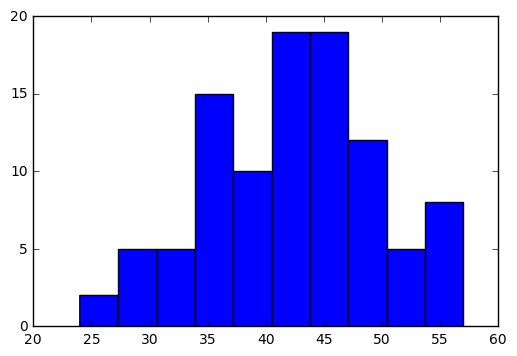

In [150]:
make_hist_and_stats(num_patients_hist)

### The number of patients to wait

25pct: 3.000  /median: 5.000 /75pct: 8.000


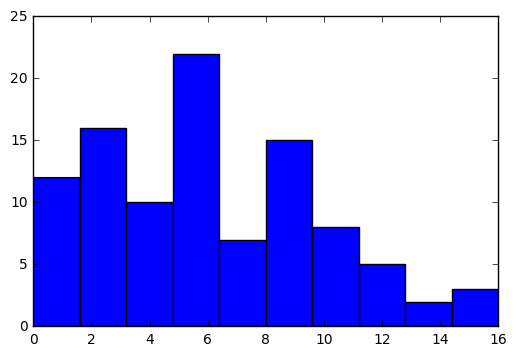

In [151]:
make_hist_and_stats(wait_patient_num_hist)

### average wait

25pct: 0.180  /median: 0.376 /75pct: 0.592


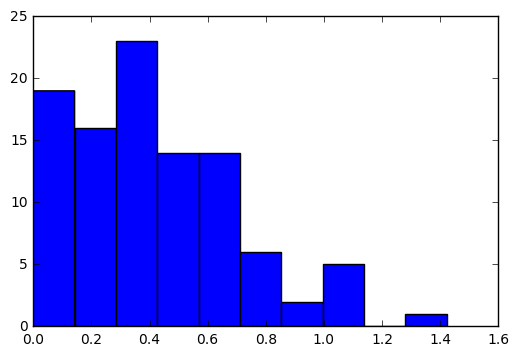

In [152]:
make_hist_and_stats(avg_wait_time_hist)

### Overtime

25pct: 0.000  /median: 6.074 /75pct: 11.883


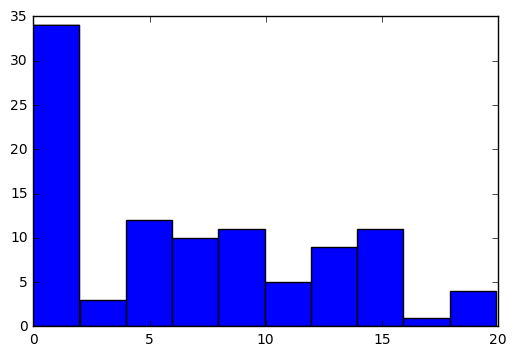

In [153]:
overtime_ar = np.array(close_time_hist) - 420
overtime_ar[overtime_ar <0] = 0
make_hist_and_stats(overtime_ar)

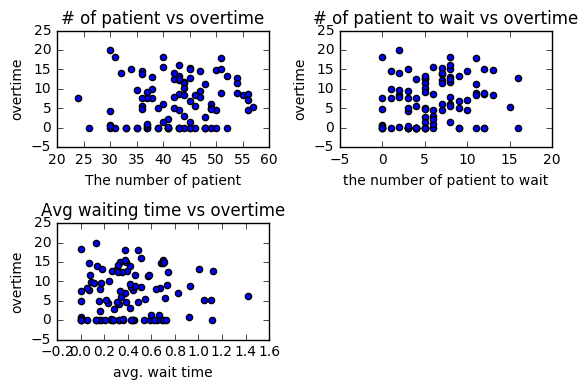

In [162]:
plt.subplot(2, 2, 1)
plt.scatter(x =num_patients_hist, y= overtime_ar)
plt.title(r"# of patient vs overtime")
plt.xlabel("The number of patient")
plt.ylabel("overtime")

plt.subplot(2, 2, 2)
plt.scatter(x =wait_patient_num_hist, y= overtime_ar)
plt.title(r"# of patient to wait vs overtime")
plt.xlabel("the number of patient to wait")
plt.ylabel("overtime")


plt.subplot(2, 2, 3)
plt.scatter(x =avg_wait_time_hist, y= overtime_ar)
plt.title(r"Avg waiting time vs overtime")
plt.xlabel("avg. wait time")
plt.ylabel("overtime")

plt.tight_layout()